In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Масив X містить зображення тренувального набору, а масив y - позначення класів
X = x_train
y = to_categorical(y_train)  # Перетворення позначень класів на one-hot вектори

# Розділення даних на тренувальний та валідаційний набори
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# Тут також замініть data_test на x_test та аналогічно для y_test.
# Масив X_test містить зображення тестового набору, а масив y_test - позначення класів для тестування
X_test = x_test
y_test = to_categorical(y_test)


In [2]:
# Розміри кожного зображення: 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Підготовка зображень тренувального набору
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)  # Додано третій розмір - кількість каналів (1 - чорно-білі зображення)
X_train = X_train.astype('float32')  # Конвертуємо тип даних в float32
X_train /= 255  # Нормалізація значень пікселів до діапазону [0, 1]

# Підготовка зображень тестового набору
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Підготовка зображень валідаційного набору
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255


In [3]:
# Імпортування бібліотек Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Створення моделі послідовності (Sequential model)
cnn1 = Sequential()

# Додавання першого шару згортки
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Додавання шару пулінгу (поліпшення особливостей)
cnn1.add(MaxPooling2D(pool_size=(2, 2)))

# Додавання шару випадкового відключення (Dropout) для регуляризації
cnn1.add(Dropout(0.2))

# Розгладжування даних перед входом у повністю зв'язані шари
cnn1.add(Flatten())

# Додавання повністю зв'язаного шару з функцією активації ReLU
cnn1.add(Dense(128, activation='relu'))

# Додавання остаточного повністю зв'язаного шару з функцією активації Softmax (для класифікації)
cnn1.add(Dense(10, activation='softmax'))


In [4]:
import keras


# Компіляція моделі з використанням визначених параметрів
cnn1.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])


In [5]:
# Виведення структури моделі та кількості параметрів
cnn1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [6]:
# Тренування моделі та збереження історії тренування
history1 = cnn1.fit(X_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_val, y_val))


Epoch 1/10
188/188 [==============================] - 6s 31ms/step - loss: 0.5243 - accuracy: 0.8215 - val_loss: 0.3849 - val_accuracy: 0.8648
Epoch 2/10
188/188 [==============================] - 6s 30ms/step - loss: 0.3360 - accuracy: 0.8815 - val_loss: 0.3394 - val_accuracy: 0.8779
Epoch 3/10
188/188 [==============================] - 6s 31ms/step - loss: 0.3006 - accuracy: 0.8932 - val_loss: 0.3132 - val_accuracy: 0.8887
Epoch 4/10
188/188 [==============================] - 6s 30ms/step - loss: 0.2734 - accuracy: 0.9021 - val_loss: 0.2956 - val_accuracy: 0.8933
Epoch 5/10
188/188 [==============================] - 6s 31ms/step - loss: 0.2523 - accuracy: 0.9087 - val_loss: 0.2809 - val_accuracy: 0.8992
Epoch 6/10
188/188 [==============================] - 6s 31ms/step - loss: 0.2337 - accuracy: 0.9162 - val_loss: 0.2773 - val_accuracy: 0.8996
Epoch 7/10
188/188 [==============================] - 6s 30ms/step - loss: 0.2209 - accuracy: 0.9197 - val_loss: 0.2651 - val_accuracy: 0.9042

In [7]:
# Оцінка точності моделі на тестових даних
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Тестова втрата:', score1[0])
print('Тестова точність:', score1[1])


Тестова втрата: 0.25386202335357666
Тестова точність: 0.9107000231742859


In [8]:
# Імпортуємо необхідний клас для генерації зображень
from keras.preprocessing.image import ImageDataGenerator

# Створюємо об'єкт генератора зображень та задаємо параметри аугментації
gen = ImageDataGenerator(
    rotation_range=8,            # Діапазон обертання зображення
    width_shift_range=0.08,      # Діапазон зсуву по ширині зображення
    shear_range=0.3,             # Діапазон зсуву для зміщення
    height_shift_range=0.08,     # Діапазон зсуву по висоті зображення
    zoom_range=0.08              # Діапазон масштабування зображення
)

# Створюємо генератор пакетів даних для тренувального набору
batches = gen.flow(X_train, y_train, batch_size=256)

# Створюємо генератор пакетів даних для валідаційного набору
val_batches = gen.flow(X_val, y_val, batch_size=256)


In [9]:
# Запускаємо процес навчання моделі за допомогою методу fit
# Параметр batches - генератор пакетів тренувальних даних
# Параметр steps_per_epoch - кількість кроків (пакетів) для однієї епохи навчання
# Параметр epochs - кількість епох навчання
# Параметр validation_data - генератор пакетів валідаційних даних
# Параметр validation_steps - кількість кроків (пакетів) для однієї епохи валідації

history1 = cnn1.fit(
    batches,                      # Генератор тренувальних пакетів
    steps_per_epoch=48000//256,   # Кількість кроків для однієї епохи тренування
    epochs=50,                    # Кількість епох тренування
    validation_data=val_batches,  # Генератор валідаційних пакетів
    validation_steps=12000//256   # Кількість кроків для однієї епохи валідації
)


Epoch 1/50
187/187 [==============================] - 13s 69ms/step - loss: 0.4560 - accuracy: 0.8289 - val_loss: 0.4148 - val_accuracy: 0.8463
Epoch 2/50
187/187 [==============================] - 13s 67ms/step - loss: 0.3963 - accuracy: 0.8515 - val_loss: 0.3875 - val_accuracy: 0.8593
Epoch 3/50
187/187 [==============================] - 12s 67ms/step - loss: 0.3772 - accuracy: 0.8582 - val_loss: 0.3784 - val_accuracy: 0.8623
Epoch 4/50
187/187 [==============================] - 13s 67ms/step - loss: 0.3624 - accuracy: 0.8649 - val_loss: 0.3820 - val_accuracy: 0.8575
Epoch 5/50
187/187 [==============================] - 12s 66ms/step - loss: 0.3532 - accuracy: 0.8686 - val_loss: 0.3715 - val_accuracy: 0.8637
Epoch 6/50
187/187 [==============================] - 13s 67ms/step - loss: 0.3455 - accuracy: 0.8717 - val_loss: 0.3517 - val_accuracy: 0.8720
Epoch 7/50
187/187 [==============================] - 12s 66ms/step - loss: 0.3362 - accuracy: 0.8751 - val_loss: 0.3449 - val_accuracy:

In [10]:
# Оцінка моделі на тестових даних
score1 = cnn1.evaluate(X_test, y_test, verbose=0)

# Виведення значень втрати та точності на тестових даних
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])


Test loss: 0.25702446699142456
Test accuracy: 0.9103999733924866


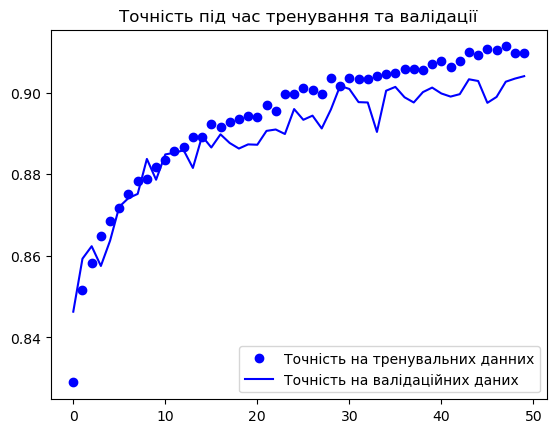

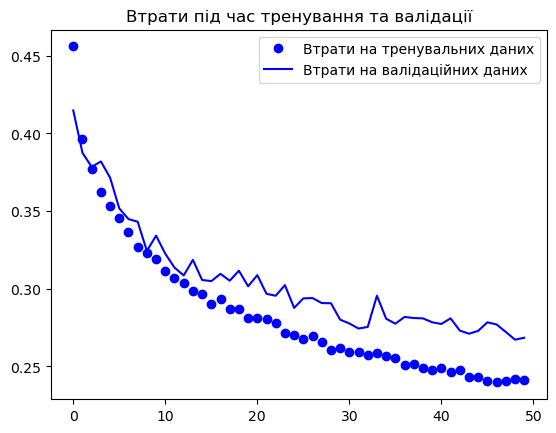

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Отримання значень точності під час тренування та валідації з історії навчання
accuracy = history1.history['accuracy']  # Точність на тренувальних даних
val_accuracy = history1.history['val_accuracy']  # Точність на валідаційних даних

# Отримання значень втрат під час тренування та валідації з історії навчання
loss = history1.history['loss']  # Втрати на тренувальних даних
val_loss = history1.history['val_loss']  # Втрати на валідаційних даних

epochs = range(len(accuracy))  # Кількість епох

# Візуалізація точності під час тренування та валідації
plt.plot(epochs, accuracy, 'bo', label='Точність на тренувальних данних')
plt.plot(epochs, val_accuracy, 'b', label='Точність на валідаційних даних')
plt.title('Точність під час тренування та валідації')
plt.legend()
plt.figure()

# Візуалізація втрат під час тренування та валідації
plt.plot(epochs, loss, 'bo', label='Втрати на тренувальних даних')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідаційних даних')
plt.title('Втрати під час тренування та валідації')
plt.legend()
plt.show()


In [12]:
import numpy as np

# Отримання передбачених ймовірностей для кожного класу
predicted_probabilities = cnn1.predict(X_test)

# Конвертування передбачених ймовірностей в передбачені індекси класів
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Отримання індексів для подальшої візуалізації
y_true = y_test.argmax(axis=1)  # Конвертування one-hot закодованих y_test в індекси класів
correct = np.nonzero(predicted_classes == y_true)[0]  # Індекси правильно передбачених зразків
incorrect = np.nonzero(predicted_classes != y_true)[0]  # Індекси неправильно передбачених зразків


313/313 [==============================] - 0s 1ms/step


In [13]:
from sklearn.metrics import classification_report

target_names = ["Клас {}".format(i) for i in range(10)]

# Вивід звіту про класифікацію для оцінки результатів передбачень
print(classification_report(y_true, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

      Клас 0       0.91      0.80      0.85      1000
      Клас 1       0.99      0.98      0.99      1000
      Клас 2       0.94      0.78      0.85      1000
      Клас 3       0.91      0.92      0.92      1000
      Клас 4       0.82      0.91      0.86      1000
      Клас 5       0.98      0.98      0.98      1000
      Клас 6       0.70      0.82      0.75      1000
      Клас 7       0.93      0.99      0.96      1000
      Клас 8       0.98      0.99      0.99      1000
      Клас 9       0.99      0.93      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



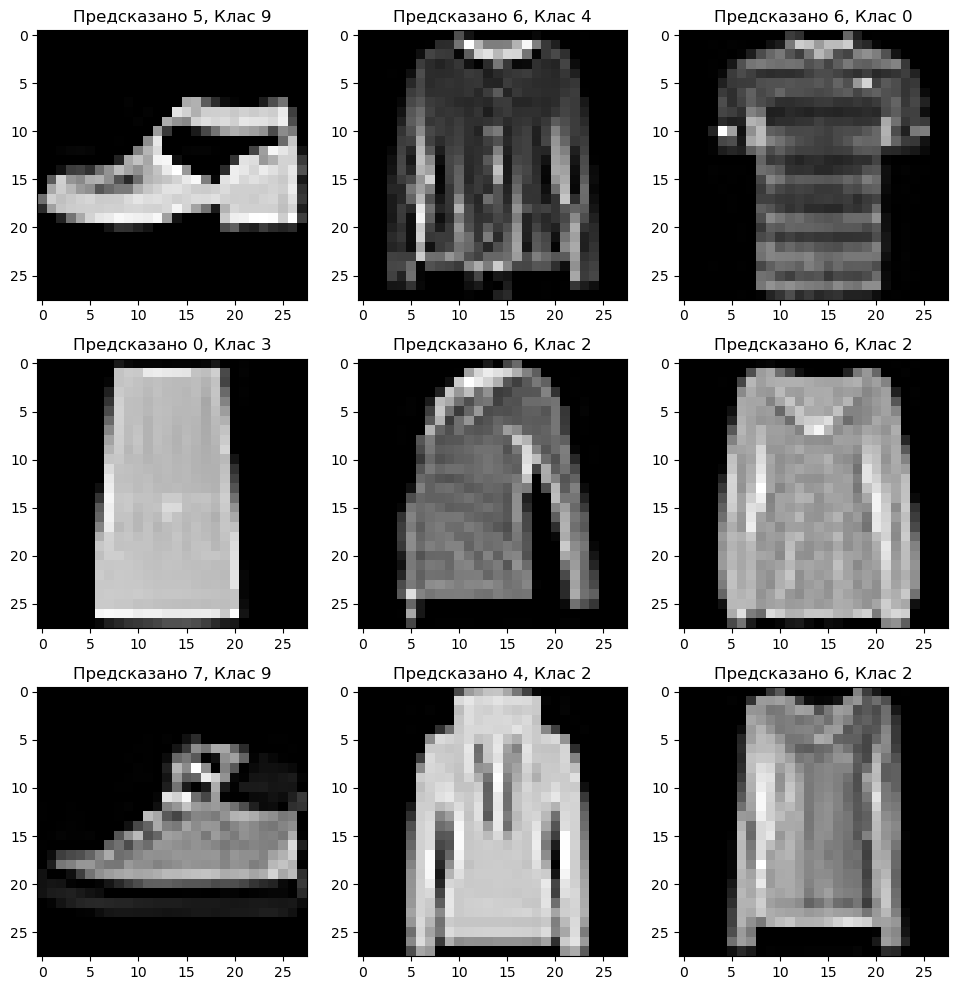

In [14]:
plt.figure(figsize=(10, 10))

# Відображення невірно передбачених зображень
for i, incorrect_idx in enumerate(incorrect[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[incorrect_idx].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Предсказано {}, Клас {}".format(predicted_classes[incorrect_idx], y_true[incorrect_idx]))
    plt.tight_layout()

plt.show()


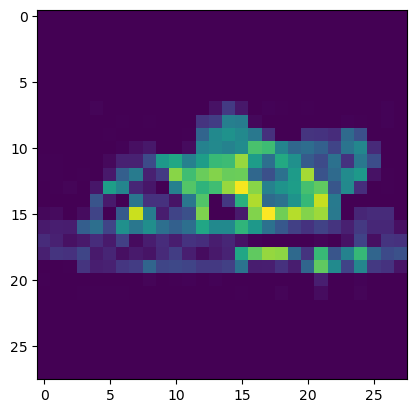

In [15]:
test_im1 = X_train[100]  # Вибір одного зображення з тренувального набору
plt.imshow(test_im1.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()


1/1 [==============================] - 0s 44ms/step


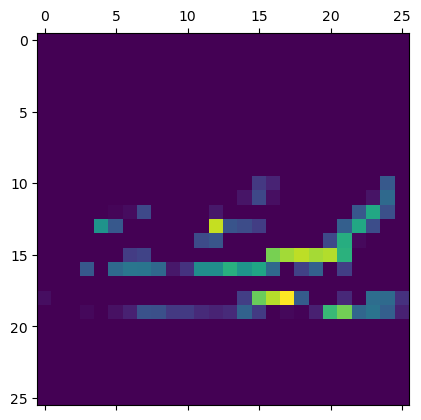

In [16]:
from keras import models

# Видобуває виходи з верхніх 8 шарів
layer_outputs = [layer.output for layer in cnn1.layers[:8]]

# Створює модель, яка поверне ці виходи при заданому вході
activation_model = models.Model(inputs=cnn1.input, outputs=layer_outputs)

# Повертає список Numpy масивів: один масив на кожний шар активації
activations = activation_model.predict(test_im1.reshape(1, 28, 28, 1))

# Активація першого шару конволюції
first_layer_activation = activations[0]

# Відображення 4-го каналу активації першого шару оригінальної моделі
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')


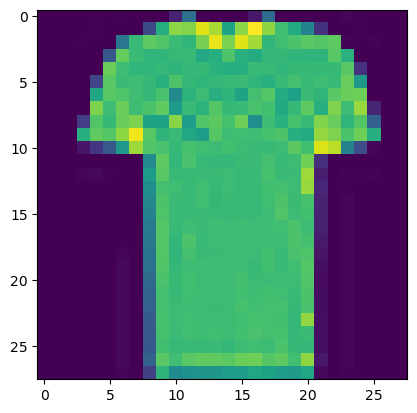

In [17]:
test_im2 = X_train[500]  # Обираємо зображення з індексом 500 з тренувального набору

# Відображаємо зображення, змінюючи його розмір на 28x28 пікселів та використовуючи колірну мапу "viridis". Інтерполяцію вимикаємо.
plt.imshow(test_im2.reshape(28, 28), cmap='viridis', interpolation='none')  
plt.show()  # Показуємо зображення


1/1 [==============================] - 0s 11ms/step


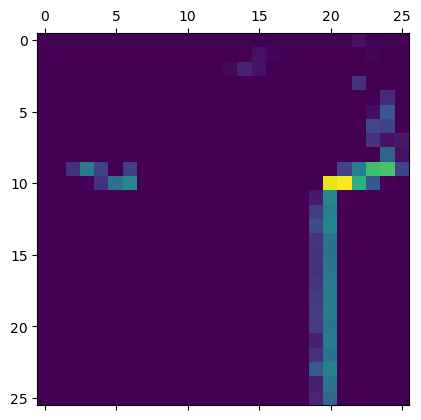

In [18]:
activations = activation_model.predict(test_im2.reshape(1, 28, 28, 1))  # Обчислюємо активації для зображення test_im2 за допомогою активаційної моделі
first_layer_activation = activations[0]  # Витягаємо активації першого шару
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')  # Відображаємо активації 4-го каналу першого шару з використанням колірної мапи "viridis"


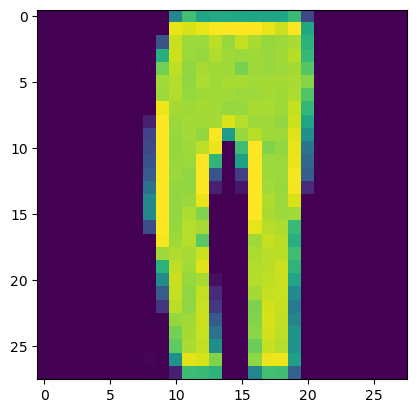

In [19]:
test_im3 = X_train[1000]  # Вибір зображення test_im3 з тренувального набору
plt.imshow(test_im3.reshape(28,28), cmap='viridis', interpolation='none')  # Відображення зображення test_im3 за допомогою колірної мапи "viridis"
plt.show()  # Показати зображення


1/1 [==============================] - 0s 11ms/step


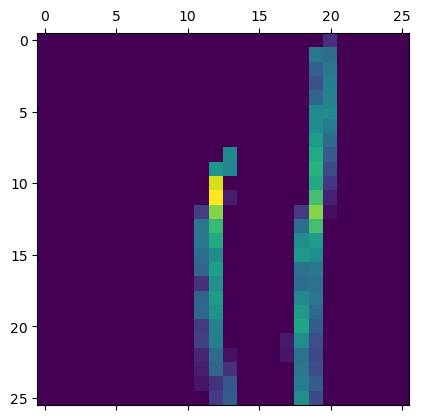

In [20]:
activations = activation_model.predict(test_im3.reshape(1,28,28,1))  # Отримання активацій для зображення test_im3
first_layer_activation = activations[0]  # Вибір активацій першого шару
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')  # Відображення матриці активацій четвертого каналу першого шару з використанням колірної мапи "viridis"


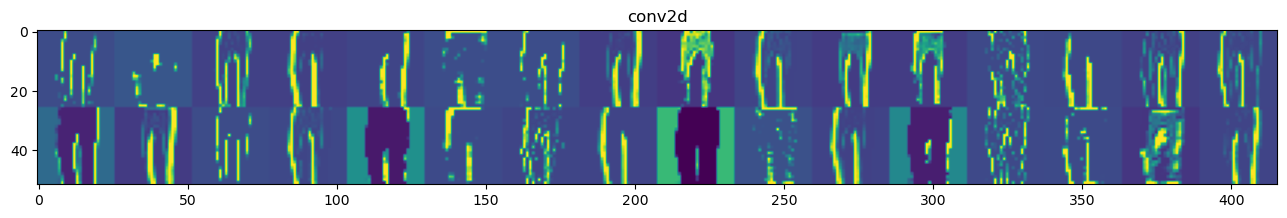

In [21]:
layer_names = []
for layer in cnn1.layers[:-1]:
    layer_names.append(layer.name) 

images_per_row = 16  # Кількість зображень на ряд
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):  # Якщо шар починається з 'conv'
        n_features = layer_activation.shape[-1]  # Кількість каналів активації
        size = layer_activation.shape[1]  # Розмір активації
        n_cols = n_features // images_per_row  # Кількість рядків
        display_grid = np.zeros((size * n_cols, images_per_row * size))  # Підготовка матриці для відображення
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]  # Вибір одного каналу активації
                channel_image -= channel_image.mean()  # Центрування даних
                channel_image /= channel_image.std()  # Нормалізація даних
                channel_image *= 64  # Збільшення контрастності
                channel_image += 128  # Зсув
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')  # Обмеження значень
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image  # Заповнення матриці відображення
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)  # Заголовок - назва шару
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')  # Відображення активацій з використанням колірної мапи "viridis"
